[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-01-apt-price-input)

# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 :
    * 공공데이터 포털 : https://www.data.go.kr/data/15061057/fileData.do
    * 수업과 같은 데이터로 실습하기 위해 아래 링크의 데이터로 실습하는 것을 권장합니다.
    * 데이터셋 다운로드(구글드라이브) : http://bit.ly/open-data-set-folder
    * 데이터셋 다운로드(드랍박스) : https://bit.ly/dropbox-open-data-set

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [424]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [425]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다.
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.
df_last = pd.read_csv(
    "data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240531.csv",
    encoding="cp949",
)
df_last.shape

(8840, 5)

In [426]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [427]:
# tail 로도 미리보기를 합니다.
df_last.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
8835,제주,모든면적,2024,5,7507
8836,제주,전용면적 60제곱미터이하,2024,5,
8837,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,5,7388
8838,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,5,
8839,제주,전용면적 102제곱미터초과,2024,5,7880


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [428]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.

%ls data

전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240531.csv


In [429]:
# df_first 에 담고 shape로 행과 열의 수를 출력해 봅니다.
df_first = pd.read_csv(
    "data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",
    encoding="cp949",
)
df_first.shape

(17, 22)

In [430]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [431]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [432]:
# info 로 요약합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         8840 non-null   object
 1   규모구분        8840 non-null   object
 2   연도          8840 non-null   int64 
 3   월           8840 non-null   int64 
 4   분양가격(제곱미터)  8259 non-null   object
dtypes: int64(2), object(3)
memory usage: 345.4+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [433]:
# isnull 을 통해 결측치를 봅니다.
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
8835,False,False,False,False,False
8836,False,False,False,False,False
8837,False,False,False,False,False
8838,False,False,False,False,False


In [434]:
# isnull 을 통해 결측치를 구합니다.
df_last.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    581
dtype: int64

In [435]:
# isna 를 통해 결측치를 구합니다.
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    581
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

> astype() 으로 변경할 때 공백이 있으면 에러가 발생한다.

In [436]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(제곱미터)"], errors="coerce")
df_last["분양가격"].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [437]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3


### 분양가격 요약하기

In [438]:
# info를 통해 분양가격을 봅니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         8840 non-null   object 
 1   규모구분        8840 non-null   object 
 2   연도          8840 non-null   int64  
 3   월           8840 non-null   int64  
 4   분양가격(제곱미터)  8259 non-null   object 
 5   분양가격        8135 non-null   float64
 6   평당분양가격      8135 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 483.6+ KB


In [439]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.
df_last["분양가격(제곱미터)"].describe()

# top 가장 빈번하게 등장하는 문자
# freq 가장 빈번하게 등장하는 문자가 몇번 등장하는지

count     8259
unique    3051
top           
freq        93
Name: 분양가격(제곱미터), dtype: object

In [440]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
df_last["분양가격"].describe()

# mean : 평균
# std : 펴준편차

count     8135.000000
mean      3897.434296
std       1677.629019
min       1868.000000
25%       2725.000000
50%       3436.000000
75%       4477.500000
max      14918.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [441]:
# 규모구분의 unique 값 보기
df_last["규모구분"].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [442]:
# 규모구분을 전용면적으로 변경하기
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]

0                 모든면적
1               60제곱미터
2        60제곱미터~85제곱미터
3       85제곱미터~102제곱미터
4             102제곱미터~
             ...      
8835              모든면적
8836            60제곱미터
8837     60제곱미터~85제곱미터
8838    85제곱미터~102제곱미터
8839          102제곱미터~
Name: 전용면적, Length: 8840, dtype: object

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [443]:
# info로 정보 보기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         8840 non-null   object 
 1   규모구분        8840 non-null   object 
 2   연도          8840 non-null   int64  
 3   월           8840 non-null   int64  
 4   분양가격(제곱미터)  8259 non-null   object 
 5   분양가격        8135 non-null   float64
 6   평당분양가격      8135 non-null   float64
 7   전용면적        8840 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 552.6+ KB


In [444]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열
df_last = df_last.drop(["규모구분", "분양가격(제곱미터)"], axis=1)

In [445]:
# 제거가 잘 되었는지 확인 합니다.
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적


In [446]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     8840 non-null   object 
 1   연도      8840 non-null   int64  
 2   월       8840 non-null   int64  
 3   분양가격    8135 non-null   float64
 4   평당분양가격  8135 non-null   float64
 5   전용면적    8840 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 414.5+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [447]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     9913.797638
경기    15260.672308
경남    10706.411310
경북    10163.556024
광주    12823.476027
대구    14255.925000
대전    12608.483250
부산    14617.496525
서울    27465.319922
세종    10679.954187
울산    13764.472775
인천    14156.769767
전남     9112.606667
전북     8786.018020
제주    15727.232093
충남     9683.168263
충북     8773.438610
Name: 평당분양가격, dtype: float64

In [448]:
# 전용면적으로 분양가격의 평균을 구합니다.
df_last.groupby("전용면적")["평당분양가격"].mean()

전용면적
102제곱미터~          13862.906156
60제곱미터            12372.002169
60제곱미터~85제곱미터     12444.243136
85제곱미터~102제곱미터    13297.076180
모든면적              12480.827064
Name: 평당분양가격, dtype: float64

In [449]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102제곱미터~,11165.0,16426.0,11412.0,10935.0,14632.0,15411.0,17466.0,15422.0,28503.0,10685.0,14522.0,15817.0,10068.0,9353.0,16467.0,10284.0,9263.0
60제곱미터,9285.0,15124.0,10065.0,9684.0,12068.0,13674.0,11620.0,14184.0,27191.0,10635.0,13415.0,13535.0,8956.0,8396.0,14971.0,9139.0,8451.0
60제곱미터~85제곱미터,9224.0,14633.0,9992.0,9714.0,12444.0,14249.0,11753.0,14488.0,26373.0,10693.0,13377.0,13537.0,8809.0,8524.0,15844.0,9348.0,8430.0
85제곱미터~102제곱미터,10596.0,15553.0,12151.0,10899.0,12243.0,13585.0,12606.0,14509.0,28757.0,10600.0,15071.0,14407.0,8808.0,9096.0,14679.0,10727.0,9314.0
모든면적,9378.0,14567.0,10044.0,9743.0,12586.0,14262.0,11780.0,14499.0,26588.0,10762.0,13329.0,13552.0,8851.0,8565.0,16101.0,9074.0,8419.0


In [450]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g
# g.unstack().T

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2024  전남     13365.000000
      전북     12502.285714
      제주     25297.140000
      충남     12790.800000
      충북     12673.320000
Name: 평당분양가격, Length: 170, dtype: float64

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [451]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean")

,평당분양가격
지역명,
강원,9913.797638
경기,15260.672308
경남,10706.411310
경북,10163.556024
광주,12823.476027
대구,14255.925000
대전,12608.483250
부산,14617.496525
서울,27465.319922


In [452]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()
pd.pivot_table(data=df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102제곱미터~,13862.906156
60제곱미터,12372.002169
60제곱미터~85제곱미터,12444.243136
85제곱미터~102제곱미터,13297.076180
모든면적,12480.827064


In [453]:
# 전용면적을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(data=df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102제곱미터~,13862.906156
60제곱미터,12372.002169
60제곱미터~85제곱미터,12444.243136
85제곱미터~102제곱미터,13297.076180
모든면적,12480.827064


In [454]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102제곱미터~,11165.0,16426.0,11412.0,10935.0,14632.0,15411.0,17466.0,15422.0,28503.0,10685.0,14522.0,15817.0,10068.0,9353.0,16467.0,10284.0,9263.0
60제곱미터,9285.0,15124.0,10065.0,9684.0,12068.0,13674.0,11620.0,14184.0,27191.0,10635.0,13415.0,13535.0,8956.0,8396.0,14971.0,9139.0,8451.0
60제곱미터~85제곱미터,9224.0,14633.0,9992.0,9714.0,12444.0,14249.0,11753.0,14488.0,26373.0,10693.0,13377.0,13537.0,8809.0,8524.0,15844.0,9348.0,8430.0
85제곱미터~102제곱미터,10596.0,15553.0,12151.0,10899.0,12243.0,13585.0,12606.0,14509.0,28757.0,10600.0,15071.0,14407.0,8808.0,9096.0,14679.0,10727.0,9314.0
모든면적,9378.0,14567.0,10044.0,9743.0,12586.0,14262.0,11780.0,14499.0,26588.0,10762.0,13329.0,13552.0,8851.0,8565.0,16101.0,9074.0,8419.0


In [455]:
df_last.pivot_table(index=["전용면적"], columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102제곱미터~,11165.0,16426.0,11412.0,10935.0,14632.0,15411.0,17466.0,15422.0,28503.0,10685.0,14522.0,15817.0,10068.0,9353.0,16467.0,10284.0,9263.0
60제곱미터,9285.0,15124.0,10065.0,9684.0,12068.0,13674.0,11620.0,14184.0,27191.0,10635.0,13415.0,13535.0,8956.0,8396.0,14971.0,9139.0,8451.0
60제곱미터~85제곱미터,9224.0,14633.0,9992.0,9714.0,12444.0,14249.0,11753.0,14488.0,26373.0,10693.0,13377.0,13537.0,8809.0,8524.0,15844.0,9348.0,8430.0
85제곱미터~102제곱미터,10596.0,15553.0,12151.0,10899.0,12243.0,13585.0,12606.0,14509.0,28757.0,10600.0,15071.0,14407.0,8808.0,9096.0,14679.0,10727.0,9314.0
모든면적,9378.0,14567.0,10044.0,9743.0,12586.0,14262.0,11780.0,14499.0,26588.0,10762.0,13329.0,13552.0,8851.0,8565.0,16101.0,9074.0,8419.0


In [456]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

p = df_last.pivot_table(index=["연도", "지역명"], values="평당분양가격")
p.loc[2018:2024]

평당분양가격
연도   지역명              
2018 강원    8219.255000
     경기   14258.420000
     경남    9327.670000
     경북    8680.776923
     광주    9526.953333
...                ...
2024 전남   13365.000000
     전북   12502.285714
     제주   25297.140000
     충남   12790.800000
     충북   12673.320000

[118 rows x 1 columns]

## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [457]:
import matplotlib.pyplot as plt

# plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="AppleGothic")
plt.style.use("ggplot")

In [458]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

# plt.rc("font", family=get_font_family())

### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

<Axes: xlabel='지역명'>

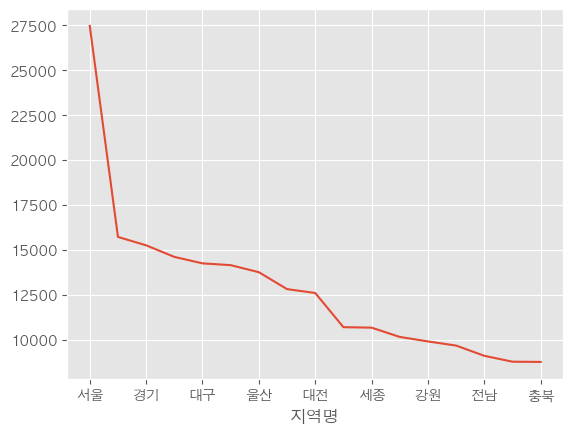

In [459]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
g = df_last.groupby("지역명")["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

<Axes: xlabel='지역명'>

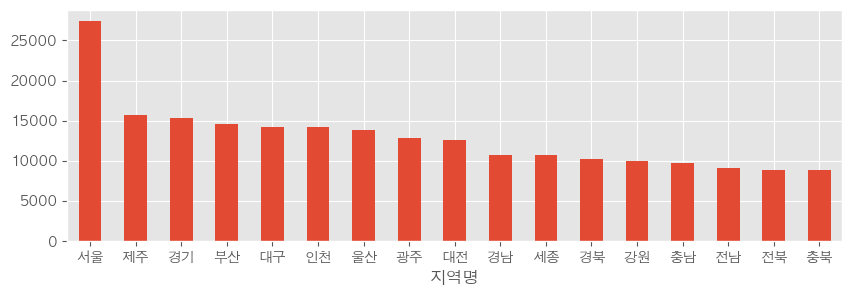

In [460]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g.plot.bar(rot=0, figsize=(10, 3))

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

<Axes: xlabel='전용면적'>

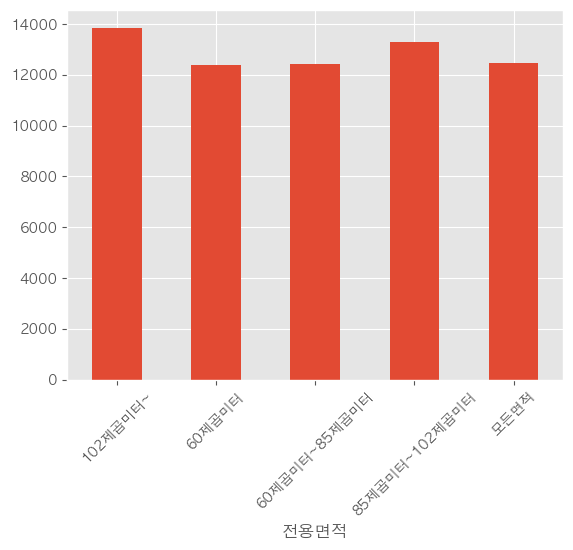

In [461]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby("전용면적")["평당분양가격"].mean().plot.bar(rot=45)

<Axes: xlabel='연도'>

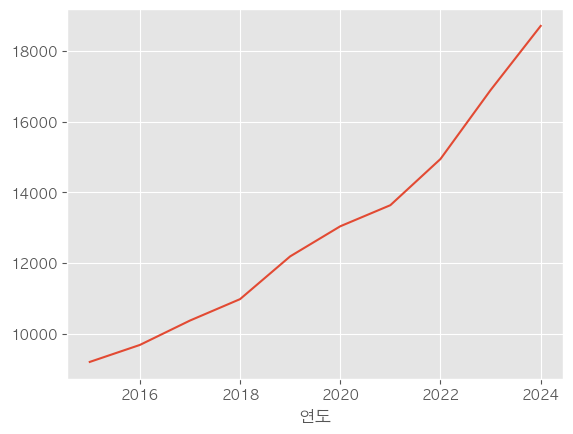

In [462]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby("연도")["평당분양가격"].mean().plot()

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 :
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<Axes: >

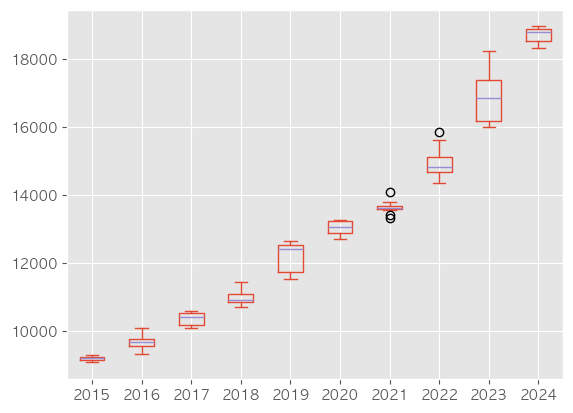

In [463]:
# index를 월, columns 를 연도로 구하고 평당분양가격 으로 pivot_table 을 구하고 상자수염그림을 그립니다.
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<Axes: >

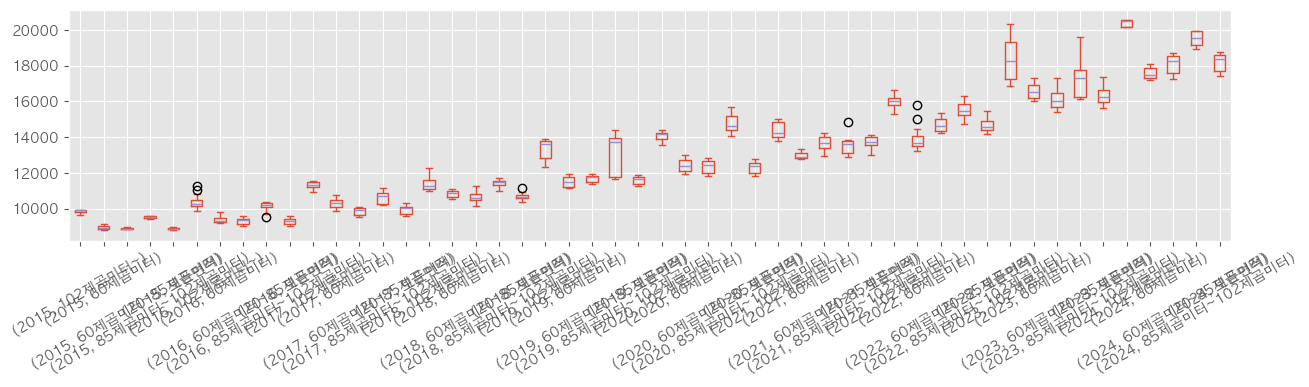

In [464]:
# columns 에 "연도", "전용면적"을 추가해서 pivot_table 을 만들고 시각화 합니다.
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)

<Axes: xlabel='연도'>

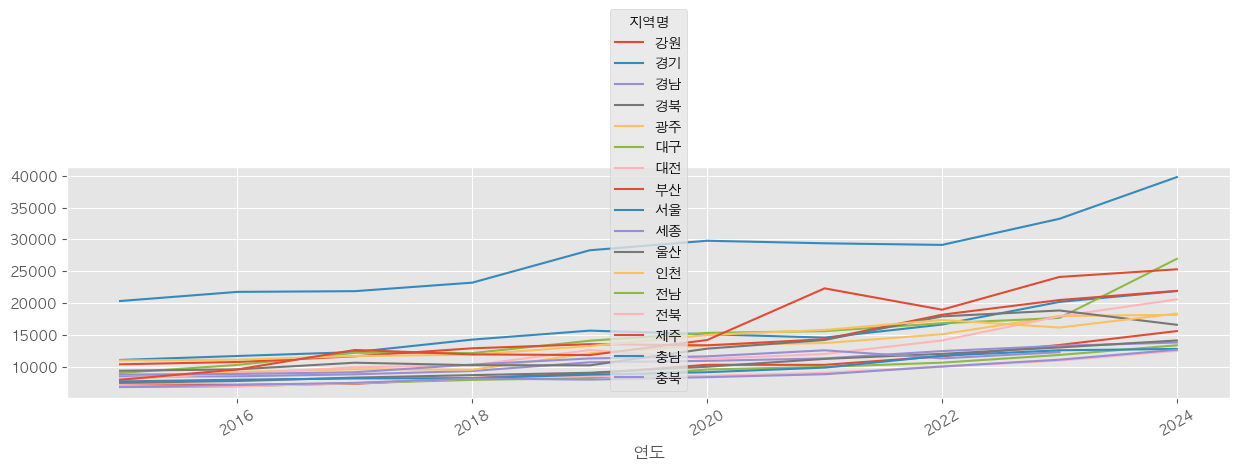

In [465]:
# index를 월, columns 를 지역명으로 구하고 평당분양가격 으로 pivot_table 을 구하고 선그래프를 그립니다.
p = df_last.pivot_table(index="연도", columns=["지역명"], values="평당분양가격")
p.plot.line(figsize=(15, 3), rot=30)

### Seaborn 으로 시각화 해보기

In [466]:
# 라이브러리 로드하기
import seaborn as sns

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_49032/3751808731.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_last, x="지역명", y="평당분양가격", hue="지역명", ci=None)


<Axes: xlabel='지역명', ylabel='평당분양가격'>

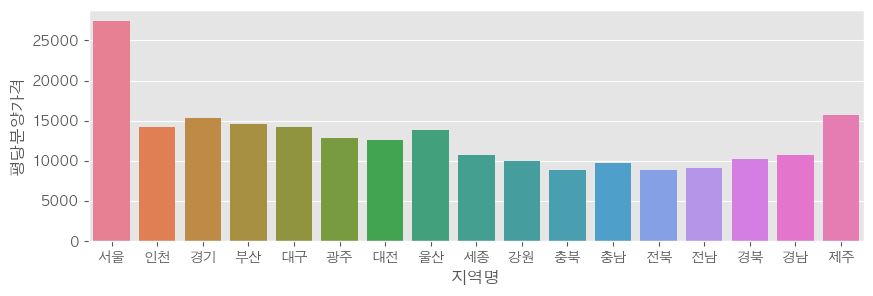

In [467]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10, 3))
# ci : confidence 신뢰구간,
# 추정해서 그린다.\ 오래 그린다 -> ci=None
# seaborn 의 장점. 통계 기술로 계산을 하지 않더라도 알아서 계산해준다.
sns.barplot(data=df_last, x="지역명", y="평당분양가격", hue="지역명", ci=None)

<Axes: xlabel='연도', ylabel='평당분양가격'>

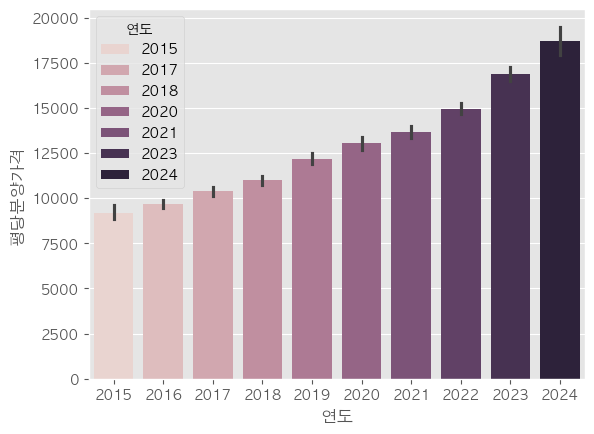

In [468]:
# barplot으로 연도별 평당분양가격을 그려봅니다.
sns.barplot(data=df_last, x="연도", y="평당분양가격", hue="연도")

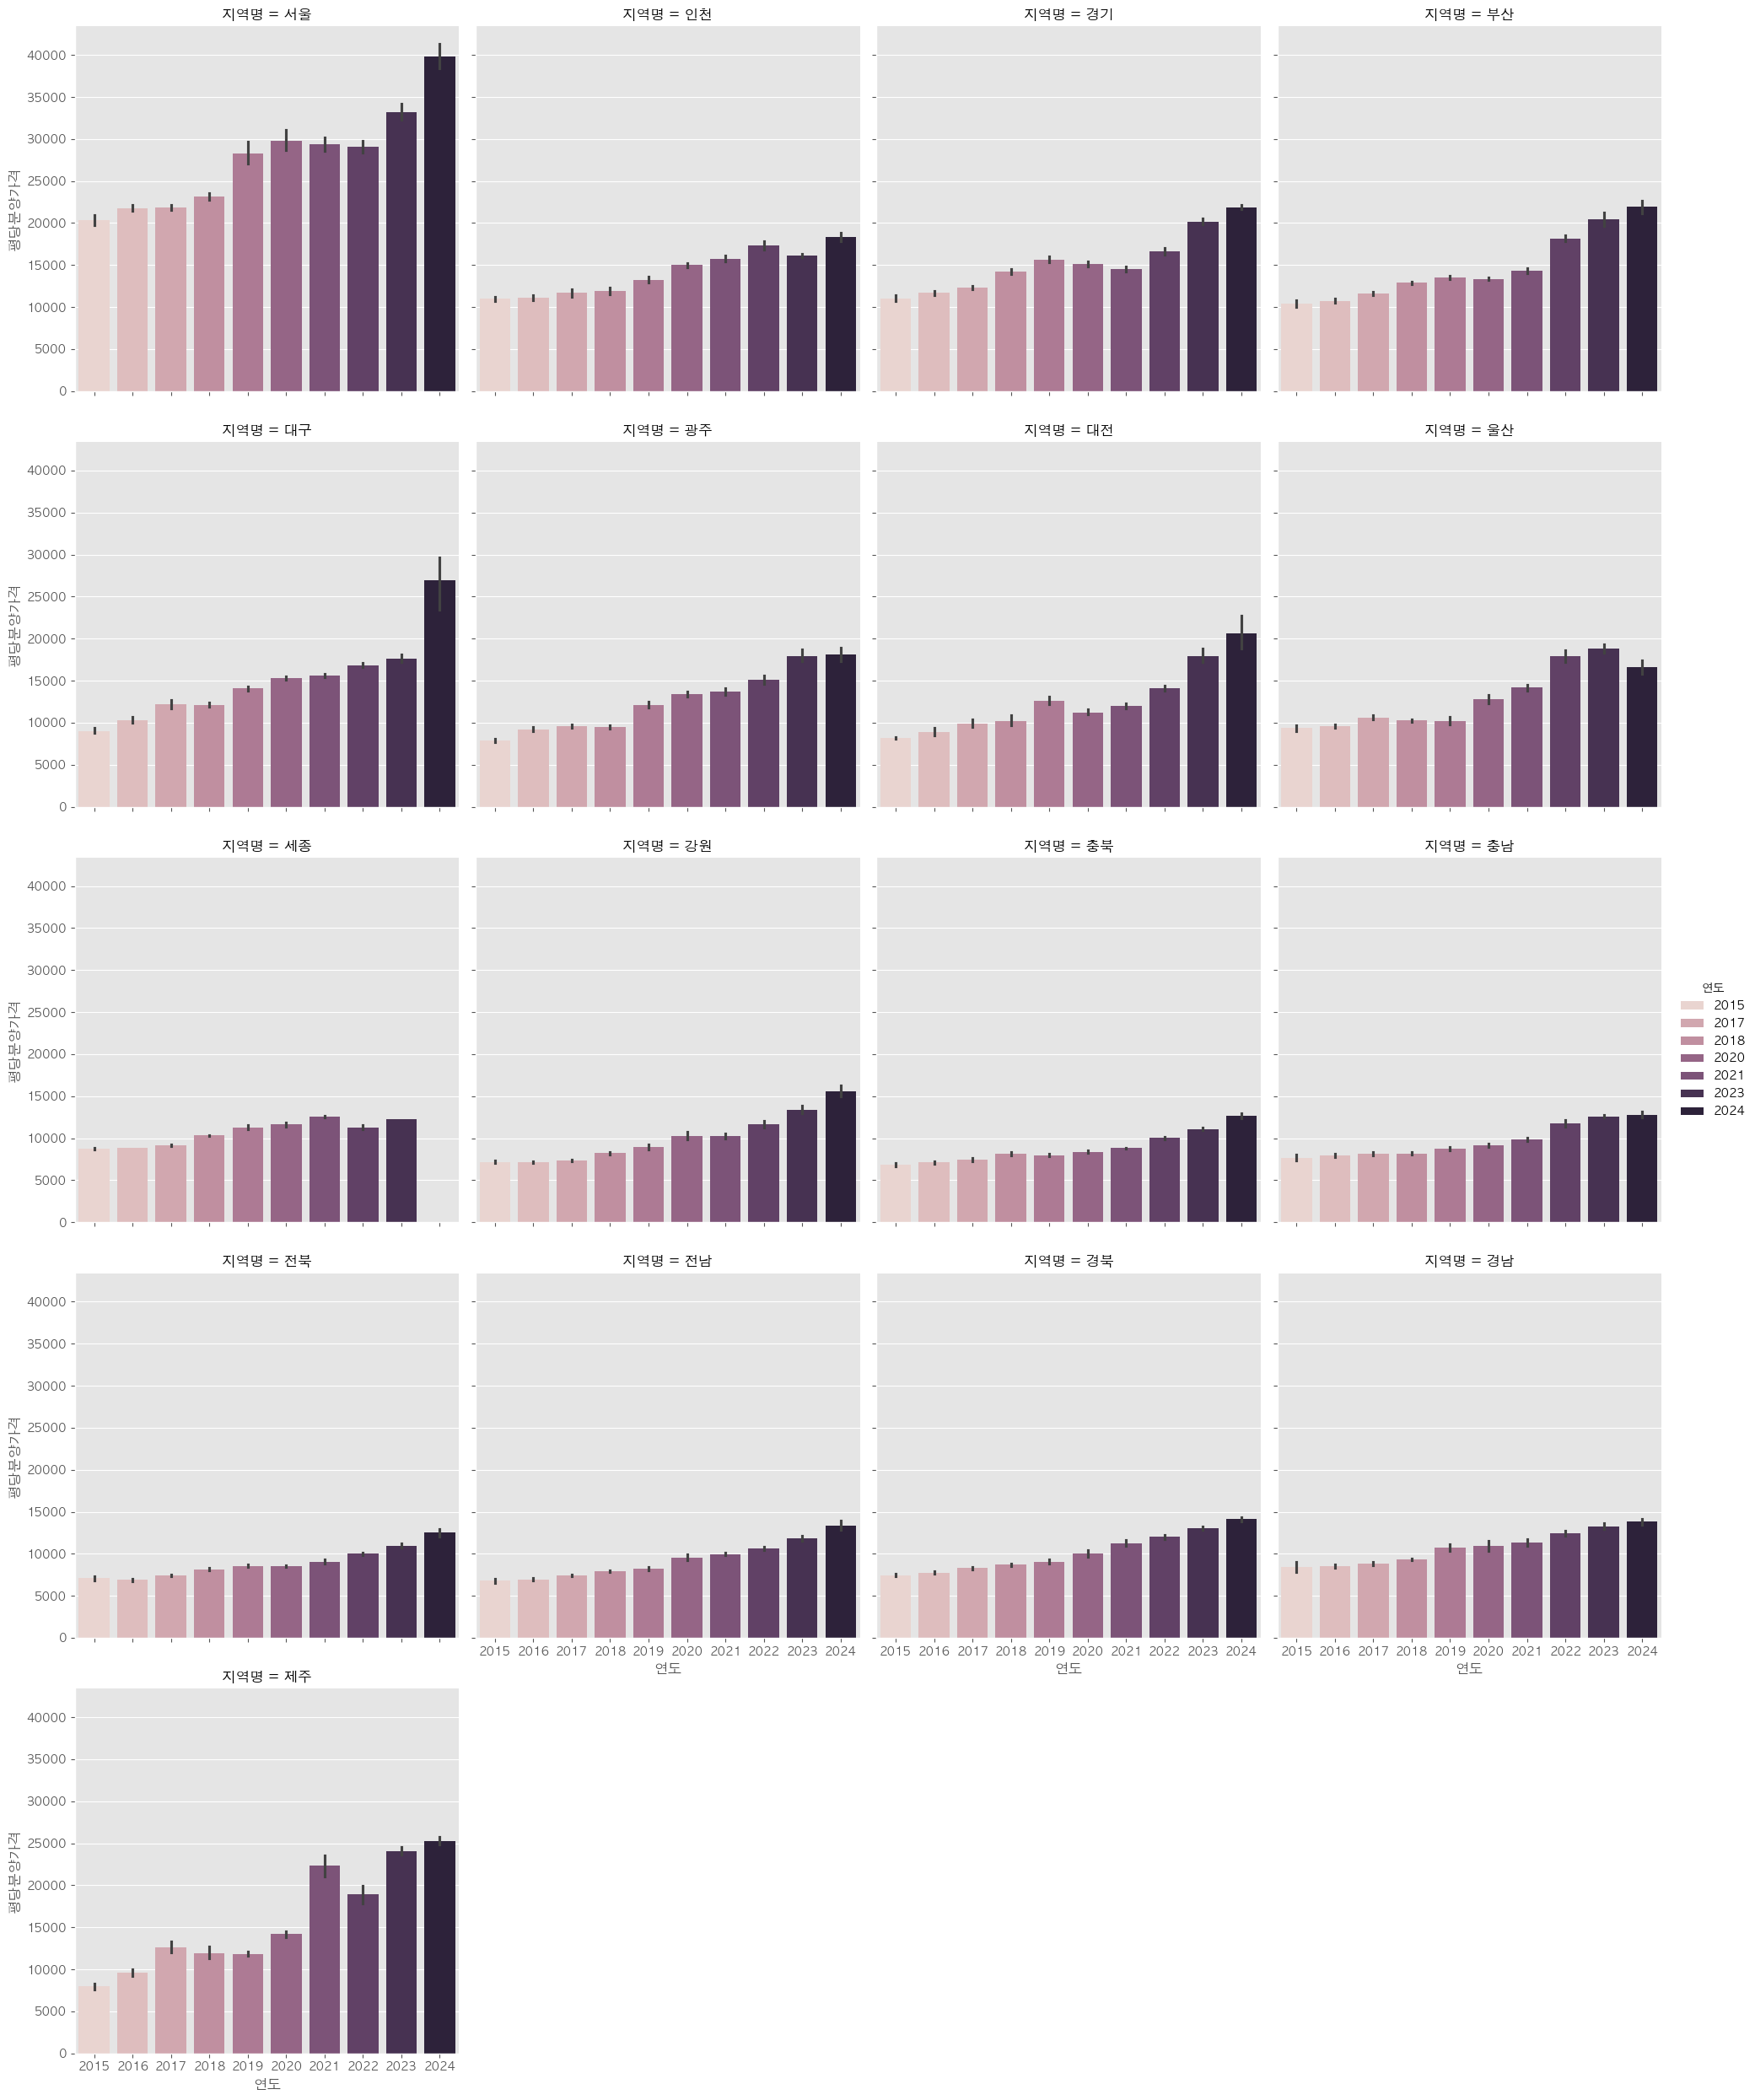

In [469]:
# catplot 으로 서브플롯 그리기
sns.catplot(
    data=df_last,
    x="연도",
    y="평당분양가격",
    kind="bar",
    hue="연도",
    col="지역명",
    col_wrap=4,
)

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

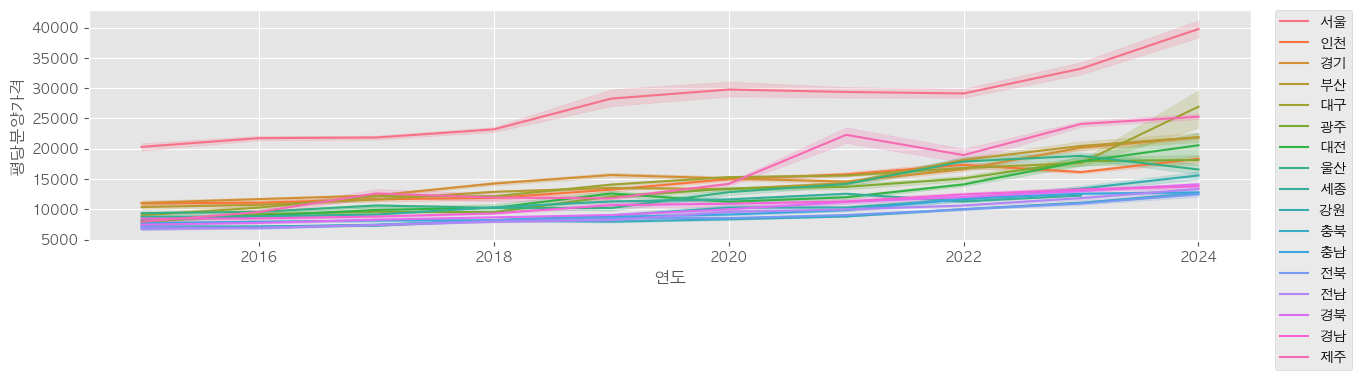

In [470]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(15, 3))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/p

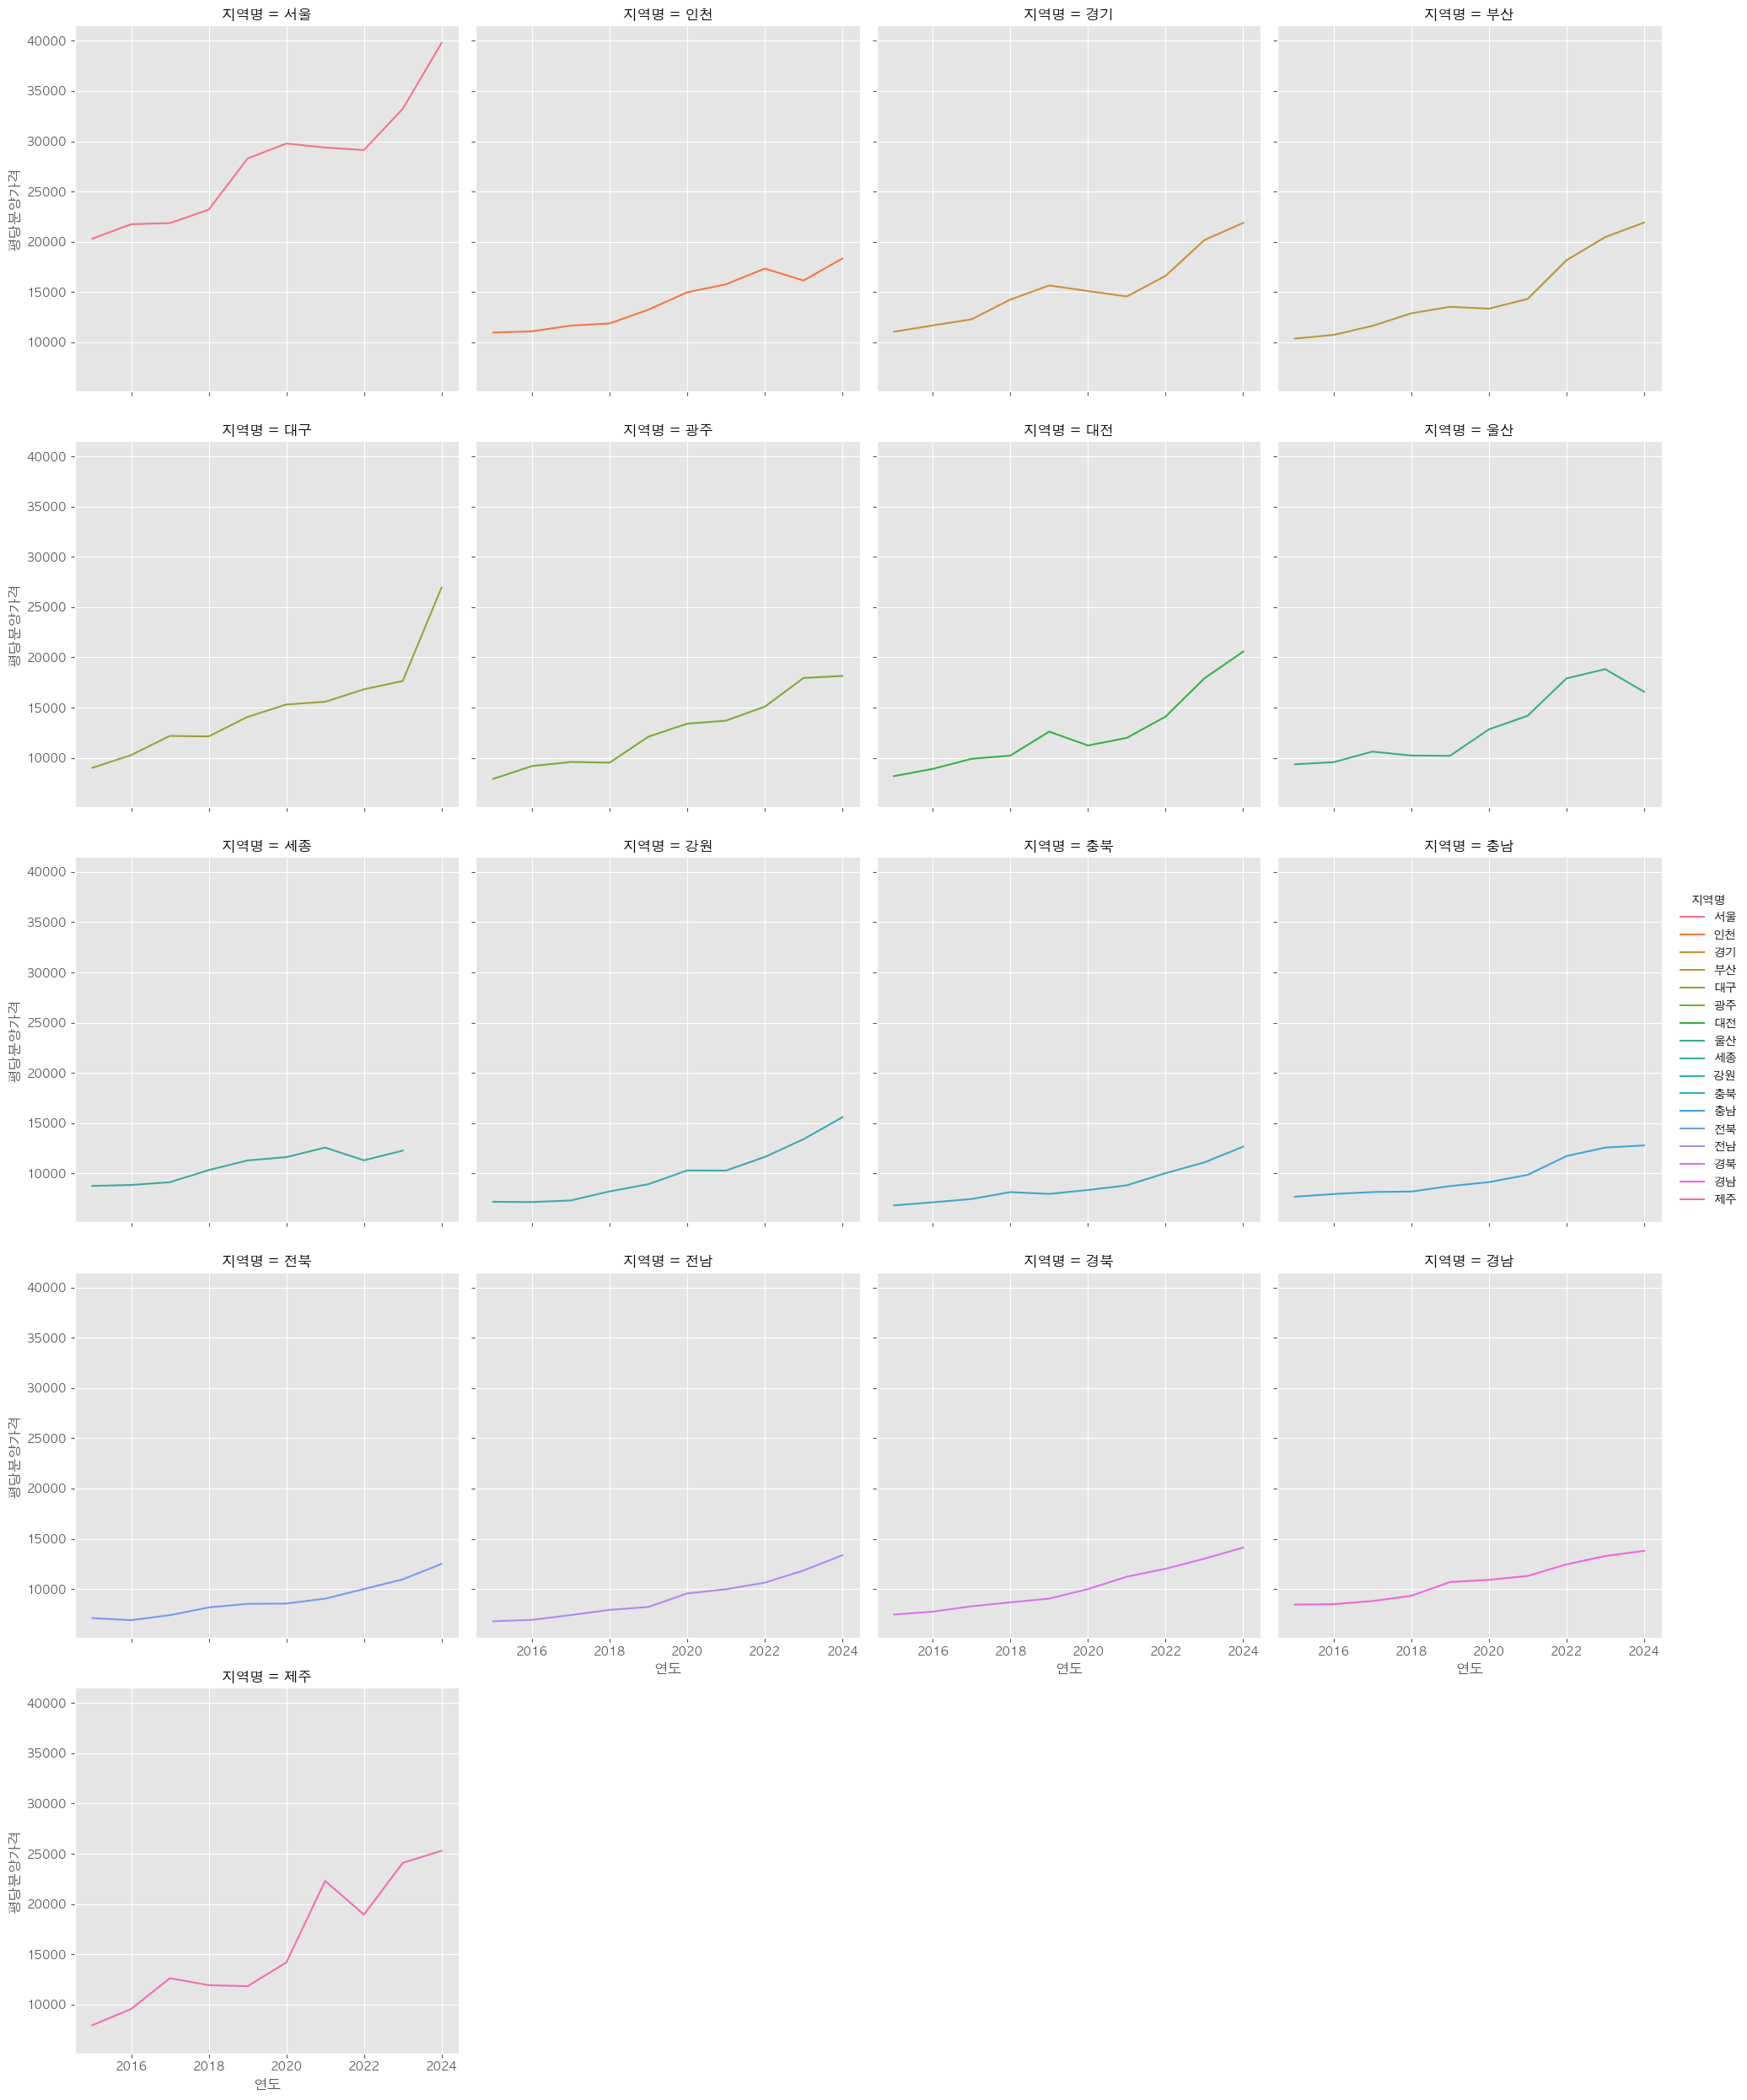

In [471]:
# relplot 으로 서브플롯 그리기
sns.relplot(
    data=df_last,
    x="연도",
    y="평당분양가격",
    hue="지역명",
    kind="line",
    col="지역명",
    col_wrap=4,
    ci=None,
)

### boxplot과 violinplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

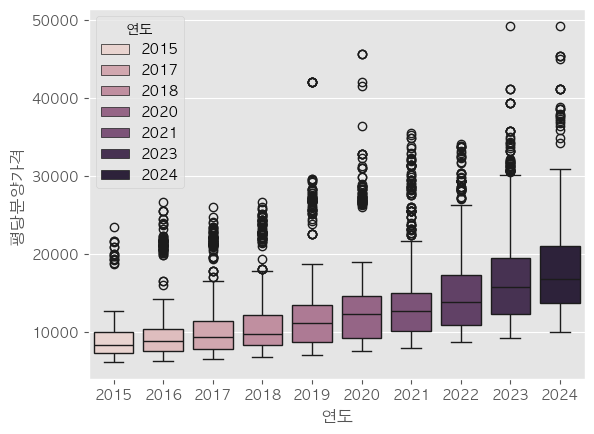

In [472]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값
sns.boxplot(
    data=df_last,
    x="연도",
    y="평당분양가격",
    hue="연도",
)

# hue 는 카테고리값이 적을 때 표현하는게 좋다

<Axes: xlabel='연도', ylabel='평당분양가격'>

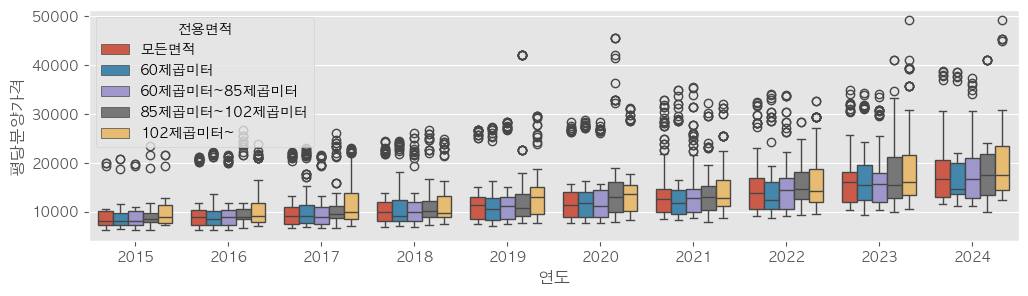

In [473]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<Axes: xlabel='연도', ylabel='평당분양가격'>

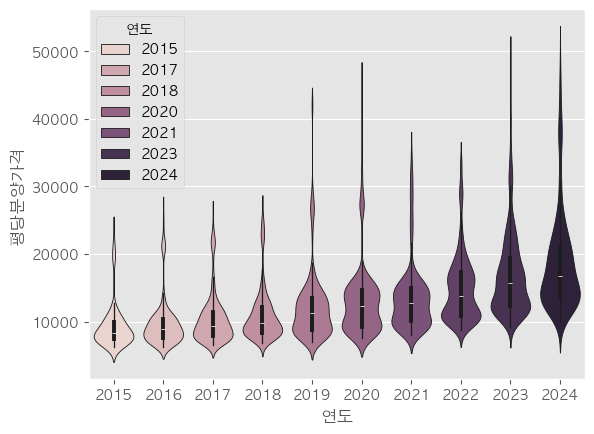

In [474]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.

sns.violinplot(data=df_last, x="연도", y="평당분양가격", hue="연도")

### lmplot과 swarmplot

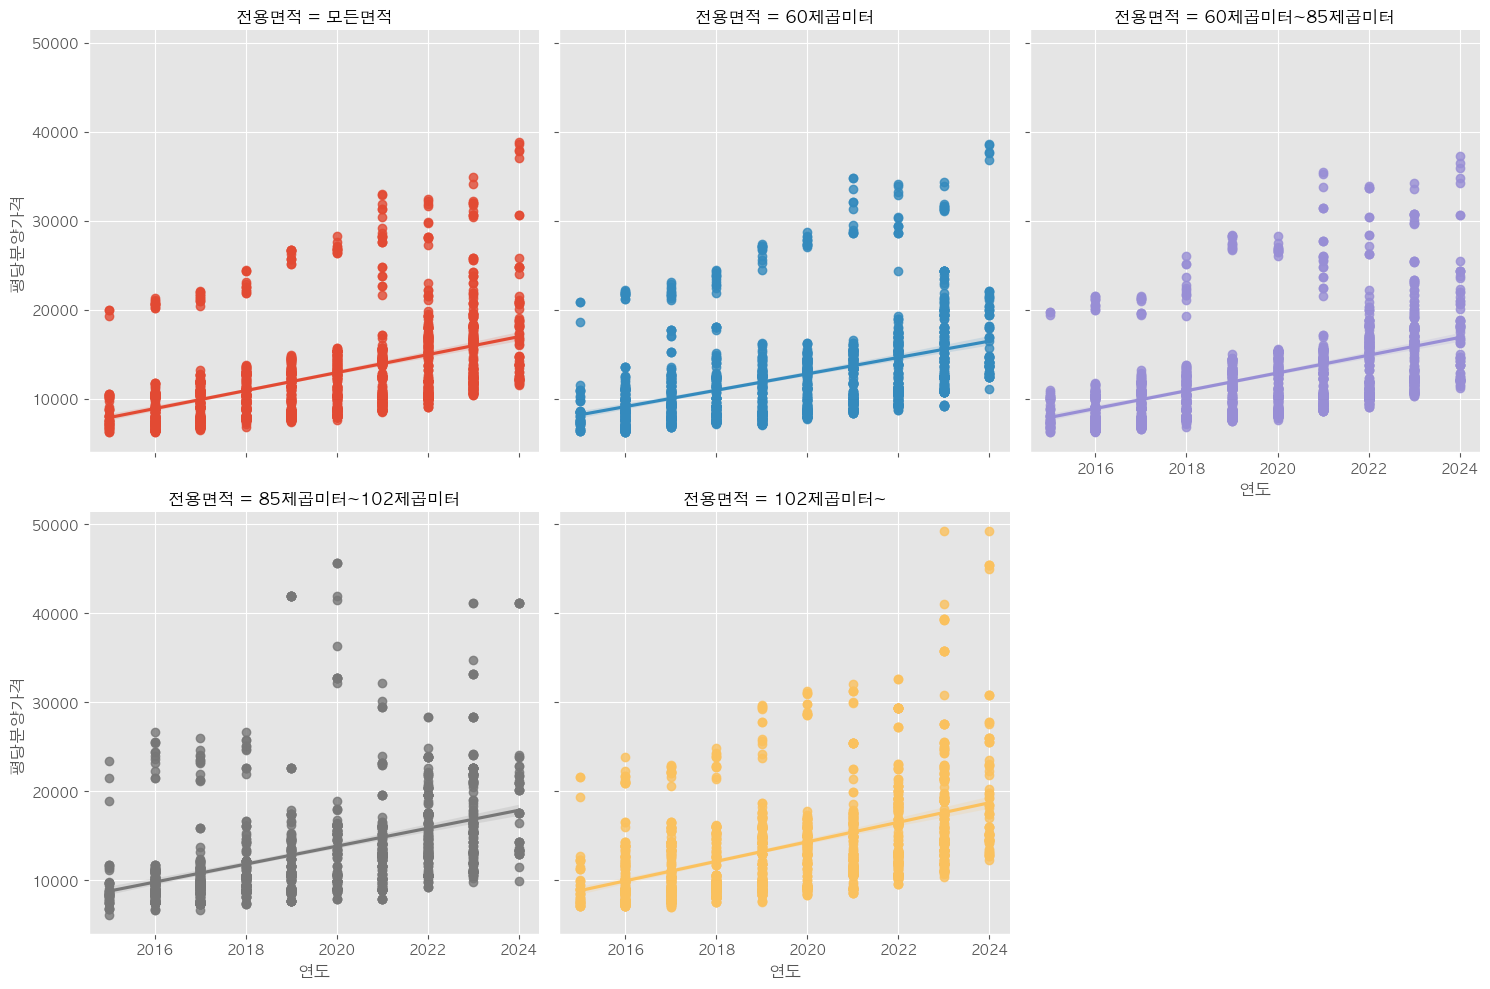

In [475]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다.
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(
    data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3
)

# regplot
# scatter plot 에 회귀선울 그려주는 있는 plot
# 양의 상관관계, 음의 상관관계

# lmplot
# regplot 에서는 hue값을 입력할 수 없는데 hue값을 사용하기 위한 plot
# x, y가 수치데이터일 때 그리는게 적합하다.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='연도', ylabel='평당분양가격'>

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


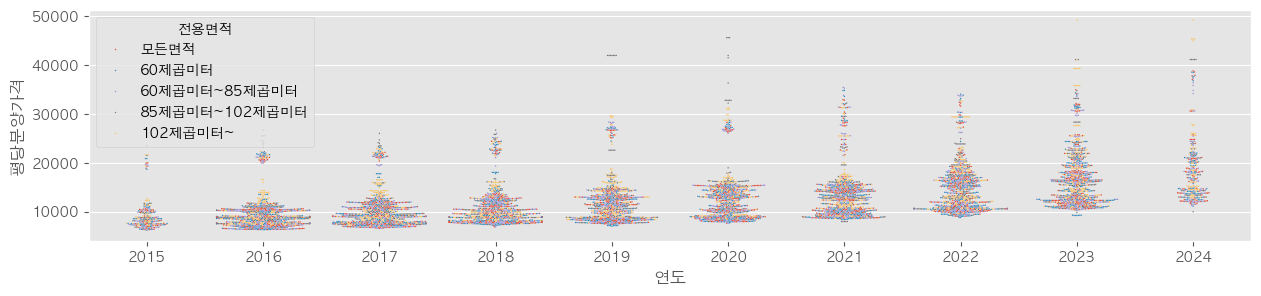

In [478]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다.
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
# 너무 많은 데이터에는 적합하지 않다.
plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", s=1, hue="전용면적")

### 이상치 보기

In [480]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.
df_last['평당분양가격'].describe()

count     8135.000000
mean     12861.533178
std       5536.175762
min       6164.400000
25%       8992.500000
50%      11338.800000
75%      14775.750000
max      49229.400000
Name: 평당분양가격, dtype: float64

In [482]:
max_price = df_last['평당분양가격'].max()
max_price

49229.399999999994

In [485]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
8334,서울,2023,12,14918.0,49229.4,102제곱미터~
8419,서울,2024,1,14918.0,49229.4,102제곱미터~


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다.
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

In [ ]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]

In [ ]:
# distplot으로 평당분양가격을 표현해 봅니다.

In [ ]:
# sns.distplot(price, hist=False, rug=True)

* distplot을 산마루 형태의 ridge plot으로 그리기
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

In [ ]:
# subplot 으로 표현해 봅니다.

In [ ]:
# pairplot

In [ ]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.

## 2015년 8월 이전 데이터 보기

In [ ]:
# 모든 컬럼이 출력되게 설정합니다.

In [ ]:
# head 로 미리보기를 합니다.

In [ ]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.

In [ ]:
# 결측치가 있는지 봅니다.

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다.
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다.
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다.
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [ ]:
# head 로 미리보기 합니다.

In [ ]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다.

In [ ]:
# df_first_melt 변수에 담겨진 컬럼의 이름을
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [ ]:
date = "2013년12월"
date

'2013년12월'

In [ ]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.

In [ ]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.

In [ ]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

In [ ]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

In [ ]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.

In [ ]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

In [ ]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.

In [ ]:
# df_first_melt 변수에 담긴 데이터프레임에서
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

In [ ]:
# df_first_melt 변수에 담긴 데이터프레임에서
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

In [ ]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.

In [ ]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

In [ ]:
cols = ["지역명", "연도", "월", "평당분양가격"]
cols

['지역명', '연도', '월', '평당분양가격']

In [ ]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다.
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.

In [ ]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [ ]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.

In [ ]:
# 제대로 합쳐졌는지 미리보기를 합니다.

In [ ]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [ ]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.

In [ ]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.

In [ ]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

In [ ]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.

In [ ]:
# Groupby로 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

In [ ]:
# barplot 으로 연도별 평당분양가격 그리기

In [ ]:
# pointplot 으로 연도별 평당분양가격 그리기

In [ ]:
# 서울만 barplot 으로 그리기

In [ ]:
# 연도별 평당분양가격 boxplot 그리기

In [ ]:
# 연도별 평당분양가격 violinplot 그리기

In [ ]:
# 연도별 평당분양가격 swarmplot 그리기

### 지역별 평당분양가격 보기

In [ ]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.

In [ ]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.

In [ ]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.

In [ ]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
# 중복인덱스 오류 발생시 df.reset_index(drop=True) 으로 인덱스를 초기화 하고 시각화 해주세요!